# Solution (5.7)

:::{solution} ex_game_of_life
:::

This notebook implements the Game of Life on a two-dimensional grid. To download this notebook, use the 'download' button at the top right.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Return the number of live neighbours of
# cell i,j of array x
def count_neighbours(x, i, j):
    sub_array = x[i-1:i+2,j-1:j+2]
    return np.sum(sub_array) - x[i,j]

# Apply the Game of Life rules to 
# the array x and return the resulting array
def advance(x):
    # create empty array of correct dimensions
    n, m = x.shape
    result = np.zeros((n, m))
    
    # fill in array
    for i in range(1, n-1):
        for j in range(1, m-1):
            # count the neighbours of cell i, j
            c = count_neighbours(x, i, j)
            # implement the Game of Life rules:

            # If the cell is dead...
            if x[i,j] == 0:
                if c == 3:
                # ...and has exactly 3 neighbours,
                    # the cell becomes alive.
                    result[i,j] = 1
            # If the cell is alive...
            else:
                # ... and has 2 or 3 neighbours,
                if c == 2 or c == 3:
                    # the cell stays alive.
                    result[i,j] = 1 
    return result

# Execute the Game of Life for num steps,
# starting from the initial array x
def execute_gol(x, num):

    fig, axes = plt.subplots(1, num+1, figsize=(10,2))

    # Plot initial grid
    axes[0].imshow(x)
    axes[0].axis("off")


    for i in range(num):
        x = advance(x)
        axes[i+1].imshow(x)
        axes[i+1].axis("off")

The following initial state eventually dies out.

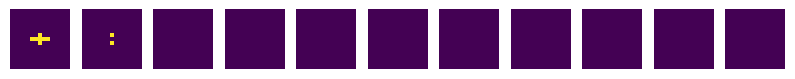

In [16]:
z = np.zeros((15, 15))
z[7,5:10] = 1
z[6:9,7] = 1

execute_gol(z, 10)

The following initial state eventually reaches a constant pattern.

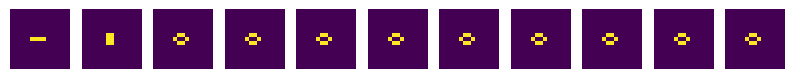

In [13]:
z = np.zeros((15, 15))
z[7,5:9] = 1

execute_gol(z, 10)

The following initial state eventually reaches a repeating cycle (period 2).

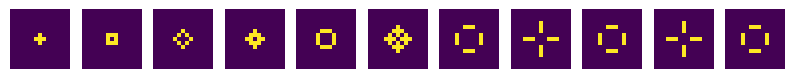

In [20]:
z = np.zeros((15, 15))
z[7,6:9] = 1
z[6:9,7] = 1

execute_gol(z, 10)

The following initial state keeps on growing. It's not easy to find or investigate such an intial pattern! 

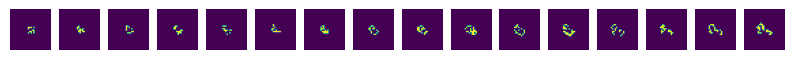

In [19]:
z = np.zeros((30, 30))
z[13:18,13:18] = np.array([[1, 1, 1, 0, 1],
                         [1, 0, 0, 0, 0],
                         [0, 0, 0, 1, 1],
                         [0, 1, 1, 0, 1],
                         [1, 0, 1, 0, 1]])

execute_gol(z, 15)